# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
import math
from datetime import date

# call today date to show the date when the results were run
# as the temperture is changing realtime
today = date.today()

# create this fucntion to round up and get a nice x-axis and y-axis labels
def round_up(var):
    return int(math.ceil(var / 10.0)) * 10

def round_dn(var):
    return int(math.floor(var / 10.0)) * 10

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
cities = [citi.title() for citi in cities]
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create base url for API access
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# create empty list to hold each city parameters and group data set
weather_response_master =[]
lat = []
lng = []
cloudi_n = []
country = []
date = []
humid =[]
maxtemp = []
wind_spd =[]
count = 0 
set = 1
invalid_ct = 0

# specify what unit system to be used
units = "imperial"


# looping to store data

print("BEGINNING DATA RETRIEVAL ...\n\
=========================================================")
for each_city in cities:
    city = each_city
    Qry_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response_each_city = requests.get(Qry_url).json()
    
    # While looping, if city not found, create message for it and keep going
    # After reviewing the data, "code = 404" is the best indication of blank database = city not found
    # if this condition is not set correctly, record is still store the empty database as valid database (not desired)
    if weather_response_each_city['cod'] == '404':
        print(f'City \033[1;34m"{each_city}"\033[00m \033[1;31mNOT FOUND !!! \033[00m Skipping...')
        invalid_ct += 1
    else:
        count += 1
        if count <50:
            set = set
        else:
            set = set + 1
            count = 1
        weather_response_master.append(weather_response_each_city)
        print(f'Processing\033[1;34m Records # {count}\033[00m of \033[1;34mSet # {set}\033[00m | \033[1;32m{each_city}\033[00m')
        lat.append(weather_response_each_city['coord']['lat'])
        lng.append(weather_response_each_city['coord']['lon'])
        cloudi_n.append(weather_response_each_city['clouds']['all'])
        country.append(weather_response_each_city['sys']['country']) 
        date.append(weather_response_each_city['dt']) 
        humid.append(weather_response_each_city['main']['humidity']) 
        maxtemp.append(weather_response_each_city['main']['temp_max']) 
        wind_spd.append(weather_response_each_city['wind']['speed'])

print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print(f'There are: \033[1;34m{invalid_ct}\033[00m cities with \033[1;31mNO RECORDS\033[00m.')
print('=-=-=-=-=-=-=-=-=END OF DATA RETRIEVAL-=-=-=-=-=-=-=-=')      

BEGINNING DATA RETRIEVAL ...
City "Barentsburg" NOT FOUND !!!  Skipping...
Processing Records # 1 of Set # 1 | Buguda
Processing Records # 2 of Set # 1 | Chokurdakh
Processing Records # 3 of Set # 1 | Esperance
Processing Records # 4 of Set # 1 | Avarua
Processing Records # 5 of Set # 1 | Busselton
Processing Records # 6 of Set # 1 | Vaini
Processing Records # 7 of Set # 1 | Thompson
Processing Records # 8 of Set # 1 | Hithadhoo
Processing Records # 9 of Set # 1 | Mar Del Plata
Processing Records # 10 of Set # 1 | Kaitangata
Processing Records # 11 of Set # 1 | Puerto Ayora
City "Ruatoria" NOT FOUND !!!  Skipping...
Processing Records # 12 of Set # 1 | Rikitea
Processing Records # 13 of Set # 1 | Norman Wells
Processing Records # 14 of Set # 1 | Tucupita
Processing Records # 15 of Set # 1 | Aras
Processing Records # 16 of Set # 1 | San Cristobal
Processing Records # 17 of Set # 1 | Port Elizabeth
Processing Records # 18 of Set # 1 | Bluff
Processing Records # 19 of Set # 1 | Datong
Pro

Processing Records # 43 of Set # 2 | Nouadhibou
Processing Records # 44 of Set # 2 | Arraial Do Cabo
Processing Records # 45 of Set # 2 | Panguna
Processing Records # 46 of Set # 2 | Albany
Processing Records # 47 of Set # 2 | Yoichi
Processing Records # 48 of Set # 2 | Qeshm
Processing Records # 49 of Set # 2 | Codrington
Processing Records # 1 of Set # 3 | Malmo
City "Angra" NOT FOUND !!!  Skipping...
Processing Records # 2 of Set # 3 | Alice Springs
Processing Records # 3 of Set # 3 | Poum
Processing Records # 4 of Set # 3 | Longyearbyen
Processing Records # 5 of Set # 3 | Sosnogorsk
Processing Records # 6 of Set # 3 | Severo-Kurilsk
Processing Records # 7 of Set # 3 | Warwick
Processing Records # 8 of Set # 3 | Maun
Processing Records # 9 of Set # 3 | San Quintin
Processing Records # 10 of Set # 3 | Tasiilaq
Processing Records # 11 of Set # 3 | Arvika
City "Kuche" NOT FOUND !!!  Skipping...
City "Ust-Bolsheretsk" NOT FOUND !!!  Skipping...
Processing Records # 12 of Set # 3 | Vardo

Processing Records # 38 of Set # 4 | Alyangula
Processing Records # 39 of Set # 4 | San Patricio
Processing Records # 40 of Set # 4 | Biak
Processing Records # 41 of Set # 4 | Batagay
Processing Records # 42 of Set # 4 | Chumikan
Processing Records # 43 of Set # 4 | Blackwater
Processing Records # 44 of Set # 4 | Bulawayo
Processing Records # 45 of Set # 4 | Sitka
Processing Records # 46 of Set # 4 | Zilupe
Processing Records # 47 of Set # 4 | Castro
City "Sentyabrskiy" NOT FOUND !!!  Skipping...
Processing Records # 48 of Set # 4 | Pokhara
Processing Records # 49 of Set # 4 | Esmeraldas
City "Bargal" NOT FOUND !!!  Skipping...
Processing Records # 1 of Set # 5 | Katsuura
Processing Records # 2 of Set # 5 | Luderitz
Processing Records # 3 of Set # 5 | Ambunti
Processing Records # 4 of Set # 5 | Raga
Processing Records # 5 of Set # 5 | Stornoway
Processing Records # 6 of Set # 5 | Cabo San Lucas
Processing Records # 7 of Set # 5 | Banbury
Processing Records # 8 of Set # 5 | Cap Malheure

Processing Records # 34 of Set # 6 | Sobolevo
Processing Records # 35 of Set # 6 | Ibotirama
Processing Records # 36 of Set # 6 | Antofagasta
Processing Records # 37 of Set # 6 | Chuy
Processing Records # 38 of Set # 6 | Maues
Processing Records # 39 of Set # 6 | Ilulissat
Processing Records # 40 of Set # 6 | Voznesenye
Processing Records # 41 of Set # 6 | Brooks
Processing Records # 42 of Set # 6 | Kruisfontein
Processing Records # 43 of Set # 6 | Teya
Processing Records # 44 of Set # 6 | Deskati
Processing Records # 45 of Set # 6 | Hobart
Processing Records # 46 of Set # 6 | Colac
Processing Records # 47 of Set # 6 | Camacha
Processing Records # 48 of Set # 6 | Geraldton
Processing Records # 49 of Set # 6 | Rio Gallegos
Processing Records # 1 of Set # 7 | Gangarampur
Processing Records # 2 of Set # 7 | Kawalu
Processing Records # 3 of Set # 7 | Luanda
Processing Records # 4 of Set # 7 | Carnarvon
Processing Records # 5 of Set # 7 | Kousseri
Processing Records # 6 of Set # 7 | Hobyo
P

Processing Records # 29 of Set # 8 | Rocha
Processing Records # 30 of Set # 8 | Lebork
Processing Records # 31 of Set # 8 | Paraiso
Processing Records # 32 of Set # 8 | Iqaluit
Processing Records # 33 of Set # 8 | Vestmannaeyjar
Processing Records # 34 of Set # 8 | Mlonggo
Processing Records # 35 of Set # 8 | Moron
Processing Records # 36 of Set # 8 | Winnemucca
Processing Records # 37 of Set # 8 | Wapi Pathum
Processing Records # 38 of Set # 8 | Carahue
Processing Records # 39 of Set # 8 | Te Anau
Processing Records # 40 of Set # 8 | Burnie
Processing Records # 41 of Set # 8 | Sao Gabriel Da Cachoeira
Processing Records # 42 of Set # 8 | Grindavik
Processing Records # 43 of Set # 8 | Ambulu
Processing Records # 44 of Set # 8 | Pella
Processing Records # 45 of Set # 8 | Mlimba
Processing Records # 46 of Set # 8 | Christchurch
Processing Records # 47 of Set # 8 | Shimoda
Processing Records # 48 of Set # 8 | Turukhansk
Processing Records # 49 of Set # 8 | Nemuro
Processing Records # 1 of

Processing Records # 26 of Set # 10 | Ust-Nera
Processing Records # 27 of Set # 10 | Gigmoto
Processing Records # 28 of Set # 10 | Trairi
Processing Records # 29 of Set # 10 | Port Hedland
Processing Records # 30 of Set # 10 | Edendale
Processing Records # 31 of Set # 10 | Kidodi
Processing Records # 32 of Set # 10 | Cayenne
Processing Records # 33 of Set # 10 | Manjacaze
Processing Records # 34 of Set # 10 | Comodoro Rivadavia
Processing Records # 35 of Set # 10 | Manacor
City "Paramithia" NOT FOUND !!!  Skipping...
Processing Records # 36 of Set # 10 | Sorland
Processing Records # 37 of Set # 10 | Alofi
Processing Records # 38 of Set # 10 | Libreville
Processing Records # 39 of Set # 10 | Sao Joao Da Barra
Processing Records # 40 of Set # 10 | Xuddur
Processing Records # 41 of Set # 10 | Aguazul
Processing Records # 42 of Set # 10 | Svetlogorsk
City "Grand Centre" NOT FOUND !!!  Skipping...
Processing Records # 43 of Set # 10 | Constitucion
Processing Records # 44 of Set # 10 | Willi

Processing Records # 21 of Set # 12 | Vila Praia De Ancora
Processing Records # 22 of Set # 12 | Sabang
Processing Records # 23 of Set # 12 | Zelenoborsk
Processing Records # 24 of Set # 12 | Neftcala
Processing Records # 25 of Set # 12 | Chipata
Processing Records # 26 of Set # 12 | Svetlaya
Processing Records # 27 of Set # 12 | Boyolangu
Processing Records # 28 of Set # 12 | Umea
Processing Records # 29 of Set # 12 | Saint George
Processing Records # 30 of Set # 12 | Bria
City "Bobonong" NOT FOUND !!!  Skipping...
Processing Records # 31 of Set # 12 | Sungaipenuh
Processing Records # 32 of Set # 12 | Labuhan
Processing Records # 33 of Set # 12 | Tomatlan
Processing Records # 34 of Set # 12 | Cockburn Town
Processing Records # 35 of Set # 12 | Juneau
Processing Records # 36 of Set # 12 | Klyuchi
Processing Records # 37 of Set # 12 | Jalu
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
There are: 52 cities with NO RECORDS.
=-=-=-=-=-=-=-=-=END OF DATA RETRIEVAL-=-=-=-=-=-=-=-=


In [4]:
# Verify data integrity while looping

if len(cities) == len(country) + invalid_ct:
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(cities) - len(country) - invalid_ct} records.')

All records are accounted for.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
main_df = pd.DataFrame({
    "City_ID" : [C_ID for C_ID in range(0, len(country))],
    "Country" : country,
    "Date" : date,
    "Latitude" : lat,
    "Longitude" : lng,
    "Cloudiness" : cloudi_n,
    "Humidity" : humid,
    "Max Temp" : maxtemp,
    "Wind Speed" : wind_spd
     })

main_df.to_csv(output_data_file, index=False)
main_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,IN,1584214774,19.82,84.80,99,76,73.89,6.49
1,1,RU,1584214125,70.63,147.92,69,98,-28.14,4.25
2,2,AU,1584214737,-33.87,121.90,75,88,64.40,16.11
3,3,CK,1584214095,-21.21,-159.78,82,78,82.40,5.82
4,4,AU,1584214189,-33.65,115.33,83,98,66.00,13.27
...,...,...,...,...,...,...,...,...,...
571,571,MX,1584214426,19.93,-105.25,0,48,87.35,9.62
572,572,TC,1584214682,21.46,-71.14,40,61,80.60,14.99
573,573,US,1584214481,58.30,-134.42,20,74,34.00,2.55
574,574,RU,1584214862,52.27,79.17,100,88,34.25,13.58


In [6]:
main_df.count()

City_ID       576
Country       576
Date          576
Latitude      576
Longitude     576
Cloudiness    576
Humidity      576
Max Temp      576
Wind Speed    576
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

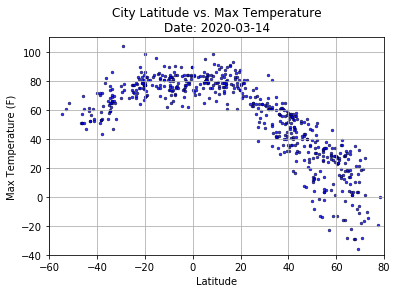

In [7]:
# Define data to plot
x_axis_lat_temp = main_df['Latitude']
y_axis_lat_temp = main_df['Max Temp']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(round_dn(x_axis_lat_temp.min()),\
         round_up(x_axis_lat_temp.max()))
plt.ylim(round_dn(y_axis_lat_temp.min()),\
         round_up(y_axis_lat_temp.max()))
plt.title(f"City Latitude vs. Max Temperature\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_temp, y_axis_lat_temp, linewidths=0.5, \
            marker ='o', facecolors='b', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_temp.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Humidity Plot

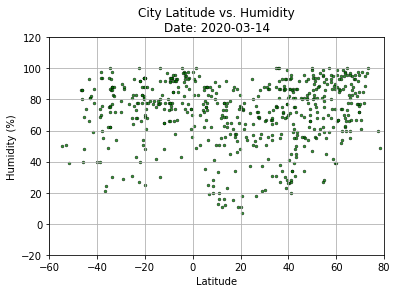

In [8]:
# Define data to plot
x_axis_lat_humd = main_df['Latitude']
y_axis_lat_humd = main_df['Humidity']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(round_dn(x_axis_lat_humd.min()),\
         round_up(x_axis_lat_humd.max()))
plt.ylim(round_dn(y_axis_lat_humd.min()) - 20,\
         round_up(y_axis_lat_humd.max()) + 20)
plt.title(f"City Latitude vs. Humidity\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_humd, y_axis_lat_humd, linewidths=0.5, \
            marker ='o', facecolors='g', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_humd.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Cloudiness Plot

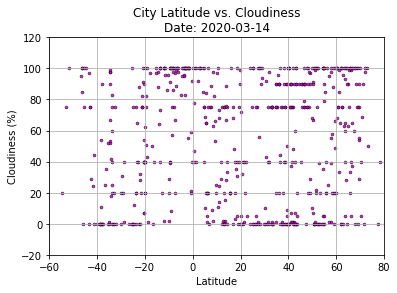

In [9]:
# define data to plot
x_axis_lat_cld = main_df['Latitude']
y_axis_lat_cld = main_df['Cloudiness']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(round_dn(x_axis_lat_cld.min()),\
         round_up(x_axis_lat_cld.max()))
plt.ylim(round_dn(y_axis_lat_cld.min()) - 20,\
         round_up(y_axis_lat_cld.max()) + 20)
plt.title(f"City Latitude vs. Cloudiness\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_cld, y_axis_lat_cld, linewidths=0.5, \
            marker ='o', facecolors = 'm', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_cld.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Wind Speed Plot

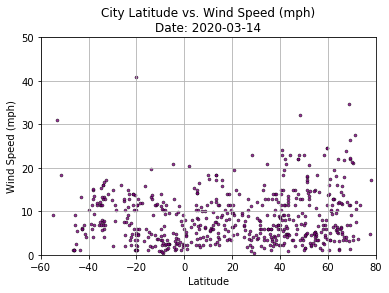

In [10]:
# define data to plot
x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(round_dn(x_axis_lat_wnspd.min()),\
         round_up(x_axis_lat_wnspd.max()))
plt.ylim(round_dn(y_axis_lat_wnspd.min()),\
         round_up(y_axis_lat_wnspd.max()))
plt.title(f"City Latitude vs. Wind Speed (mph)\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_wnspd, y_axis_lat_wnspd, linewidths=0.5, \
            marker ='o', facecolors = 'purple', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_wnspd.name
plt.savefig(file_name)
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
# Print out the r-squared value along with the plot.
def lin_regr (x_lin, y_lin, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_lin, y_lin)
    
     # print r-sqr values
    print('---------------------------------------------')
    print(f"The r-squared value is: \033[1;34m{round(rvalue, 2)}\033[00m") 
    
    # regression equation
    regress_values = x_lin * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'Linear Regression: \033[1;31m{line_eq}\033[00m')
    print('---------------------------------------------')
    
    # create plot parameters
    plt.scatter(x_lin, y_lin, linewidths=0.5, \
            marker ='o', facecolors = 'g', edgecolors = 'k',\
            alpha = 0.8, s = 10)
    plt.plot(x_lin,regress_values,"r-", )
    x_var_mean = x_lin.median()
    y_var_mean = (y_lin.mean() + y_lin.max()) /2
    plt.annotate(line_eq,
                 xy = (x_var_mean, y_var_mean),
                 xycoords='data',
                 xytext=(5, -5),
                 va='bottom',
                 textcoords='offset points', 
                 fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle = "-", linewidth = 0.3)
    
    
    # print correct hemisphere region for chart name and title based on latitude
    if x_lin.mean() < 0:   # South hemisphere : negative latitudes
        title =  f'Southern Hemisphere | Date: {today}\n{x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Southern_" + y_lin.name
        plt.savefig(file_name)
                 
    else:
        title =  f'Northern Hemisphere | Date: {today}\n{x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Northern_" + y_lin.name
        plt.savefig(file_name)  

---------------------------------------------
The r-squared value is: 0.11
Linear Regression: y = 0.02x + 8.15
---------------------------------------------


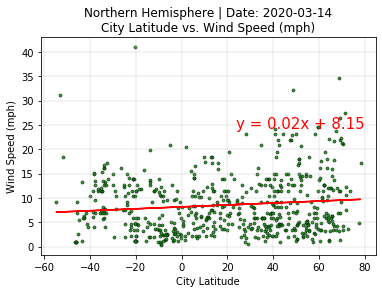

In [12]:
# TEST if the function is working

x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

lin_regr (x_axis_lat_wnspd, y_axis_lat_wnspd, x_label, y_label)

# Delete the trial run picture after verifying
import os
try:
    os.remove("Images/" + "Southern_" + y_axis_lat_wnspd.name + ".png")
except: 
    os.remove("Images/" + "Northern_" + y_axis_lat_wnspd.name + ".png")


In [13]:
# Create Northern and Southern Hemisphere DataFrames
nth_hem_df = main_df.loc[main_df["Latitude"] > 0, :]
nth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,IN,1584214774,19.82,84.80,99,76,73.89,6.49
1,1,RU,1584214125,70.63,147.92,69,98,-28.14,4.25
6,6,CA,1584214181,55.74,-97.86,20,45,5.00,3.36
12,12,CA,1584214383,65.28,-126.83,75,66,14.00,5.82
13,13,VE,1584214776,9.06,-62.05,82,41,91.67,8.37
...,...,...,...,...,...,...,...,...,...
571,571,MX,1584214426,19.93,-105.25,0,48,87.35,9.62
572,572,TC,1584214682,21.46,-71.14,40,61,80.60,14.99
573,573,US,1584214481,58.30,-134.42,20,74,34.00,2.55
574,574,RU,1584214862,52.27,79.17,100,88,34.25,13.58


In [14]:
sth_hem_df = main_df.loc[main_df["Latitude"] < 0, :]
sth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
2,2,AU,1584214737,-33.87,121.90,75,88,64.40,16.11
3,3,CK,1584214095,-21.21,-159.78,82,78,82.40,5.82
4,4,AU,1584214189,-33.65,115.33,83,98,66.00,13.27
5,5,TO,1584214185,-21.20,-175.20,75,88,80.60,10.29
7,7,MV,1584214188,-0.60,73.08,21,61,83.46,2.59
...,...,...,...,...,...,...,...,...,...
558,558,BR,1584214859,-6.64,-51.99,100,93,76.77,1.54
563,563,ZM,1584214860,-13.63,32.65,100,92,69.57,1.88
565,565,ID,1584214860,-8.12,111.89,86,92,73.71,1.14
569,569,ID,1584214861,-2.08,101.38,55,98,62.01,2.15


In [15]:
# Verify data integrity after splitting

if len(main_df.index) == len(sth_hem_df.index) + len(nth_hem_df.index):
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(main_df.index) - len(sth_hem_df.index) + len(nth_hem_df.index)} records.')

All records are accounted for.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.89
Linear Regression: y = -1.28x + 94.91
---------------------------------------------


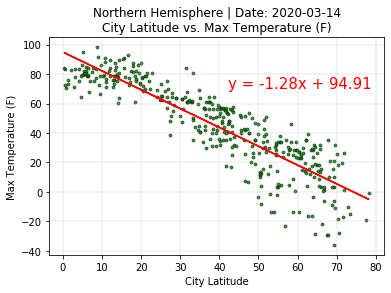

In [16]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.65
Linear Regression: y = 0.51x + 83.99
---------------------------------------------


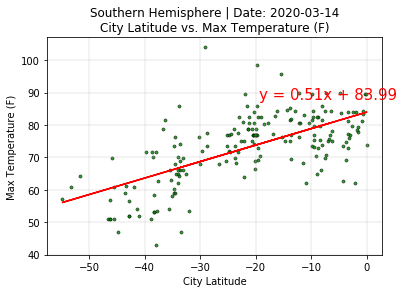

In [17]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.29
Linear Regression: y = 0.32x + 57.17
---------------------------------------------


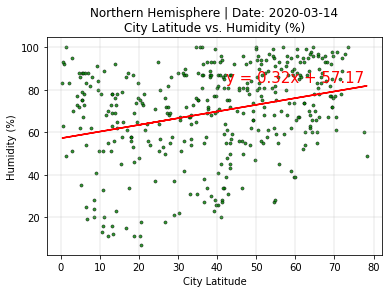

In [18]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.27
Linear Regression: y = 0.35x + 83.59
---------------------------------------------


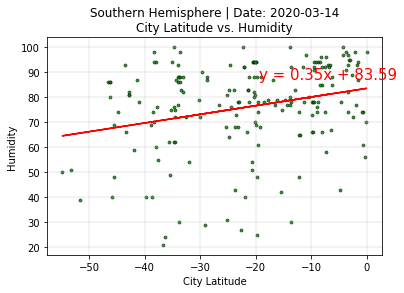

In [19]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.13
Linear Regression: y = 0.24x + 43.21
---------------------------------------------


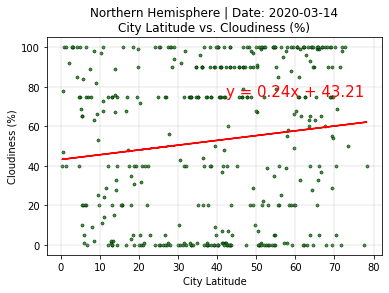

In [20]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.38
Linear Regression: y = 1.06x + 79.89
---------------------------------------------


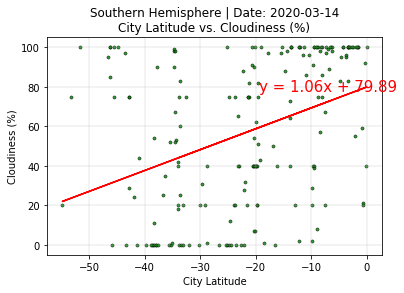

In [21]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.15
Linear Regression: y = 0.04x + 7.2
---------------------------------------------


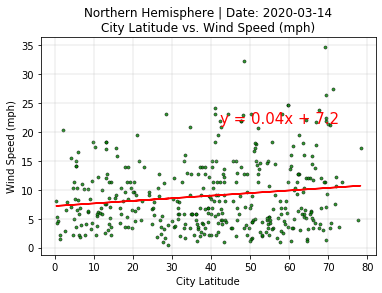

In [22]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.27
Linear Regression: y = -0.11x + 5.31
---------------------------------------------


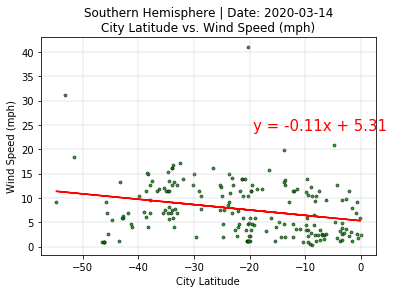

In [23]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )